In [1]:
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
score = {"chicken":-2,"dog":-2,"basket":"all","1":1,"2":2,"3":3,"4":4}
spin = ["chicken",'dog','basket',"1","2","3","4"]

What a typical game might look like

[3, 1, 0, 2, 4, 0, 0, 2, 0, 2, 0, 4, 0, 3, 1, 3, 7, 8, 6, 4, 6, 10]
It took 22 turns to reach 10


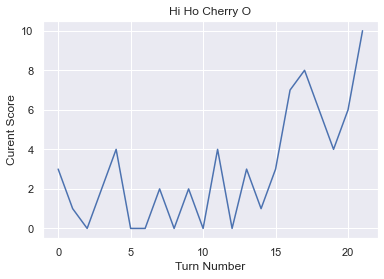

In [3]:
count = 0
turns = []

while count < 10:
    #generate the turn
    cycle = score[spin[randint(0,6)]]
    
    #if you land on the basket
    if cycle == "all":
        count = 0
    else:
        count += cycle
        #set a floor at 0
        if count <0:
            count = 0
        #set a ceiling at 10
        if count >10:
            count = 10
    turns.append(count)
    
print(turns)
print(f'It took {len(turns)} turns to reach 10')
plt.plot(turns)
plt.xlabel("Turn Number")
plt.ylabel("Curent Score")
plt.title('Hi Ho Cherry O')
plt.show()


What are the stats for 1,000,000 games

In [4]:
def game():
    
    count = 0
    turns = 0

    while count < 10:
        cycle = score[spin[randint(0,6)]]
        if cycle == "all":
            count = 0
        else:
            count += cycle
            if count <0:
                count = 0
        turns += 1
    
    return turns

In [5]:
#Simulate a lot of games

def simulation(n):
    
    results = [game() for i in range(n)]

    return pd.Series(results)

In [6]:
data = simulation(1000000)

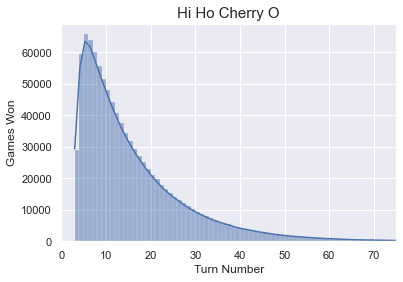

In [7]:
sns.histplot(data,bins=70,binrange=(0,70),kde=True)
plt.ylabel("Games Won")
plt.xlabel("Turn Number")
plt.title('Hi Ho Cherry O',size =15)
plt.xlim([0,75])
plt.show()

In [8]:
data.describe()

count    1000000.000000
mean          15.780804
std           12.379800
min            3.000000
25%            7.000000
50%           12.000000
75%           21.000000
max          232.000000
dtype: float64

Bootstrap Distribution

In [9]:
data.head()

0    26
1     9
2    33
3    53
4    13
dtype: int64

In [10]:
data.mean()

15.780804

In [11]:
def bootstrap(n,b=None):
    
    #run simulation
    raw_data = pd.Series([game() for i in range(n)])
    #adjust the data set for a mean of zero
    mu = raw_data.mean()
    data2 = pd.Series([(raw_data[i]-mu) for i in range(n)])
    
    bdist = []
    
    x = b
    if b == None:
        x = n
    
    for i in range(n):
        s = pd.Series([data2[randint(0,n-1)] for i in range(x)])
        bdist.append(s.mean())
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    
    sns.histplot(ax=axes[1],data=data2,bins=70,binrange=(0-mu,70-mu),kde=True)
    sns.histplot(ax=axes[0],data=raw_data,bins=70,binrange=(0,70),kde=True)
    sns.histplot(ax=axes[2],data=bdist,bins=70,kde=True)
    fig.suptitle('Hi Ho Cherry O')
    axes[1].set_title('Adjusted')
    axes[0].set_title('Raw Data')
    axes[2].set_title('Bootstrapped Distribution')
    plt.show()
    
    print('Mean is {:.0f}'.format(raw_data.mean()))
    print('Adjusted Mean is {:.0f}'.format(data2.mean()))
    #print('Boot Mean is {:.0f}'.format(bdist.mean()))
    
    return pd.Series(bdist)
    

In [ ]:
b = bootstrap(10000)

In [ ]:
b.describe()